## Task 1.1

In [1]:
from math import *

m = 0.0136 # mass of bullet 13,6g
L = 1500 # distance
v0 = 870 # bullet velocity m/s
k = 1.3/(10**5) # air resistance coefficient
g = 9.81 # gravity

alpha1_rad = 0.5 * asin((g*L)/(v0**2))
alpha1 = (alpha1_rad * 180) /pi # angle in degrees
alpha2 = (180 - alpha1*2)/2
alpha2_rad = (alpha2*pi)/180
print(alpha1, alpha2)

0.5569827681541589 89.44301723184584


## Task 1.2

In [3]:
H = (v0**2 * sin(alpha2_rad)**2)/(2*g)
H

38574.33609284569

## Task 1.3

In [4]:
import numpy as np
import matplotlib.pyplot as plt

new_alpha1_rad = 0.01
new_alpha2_rad = 1.18
new_alpha1 = (new_alpha1_rad * 180) /pi
new_alpha2 = (new_alpha2_rad * 180) /pi
d_alpha = 0.0001

S = 0
h = 0
Dt = 0.001               # timestep Delta t
t_start = 0             # starttime
t_end = 3.843999             # endtime
n_steps = int(round((t_end-t_start)/Dt))    # number of timesteps
tau = 0
Vx_arr = np.zeros(n_steps + 1)   # create an array of zeros for Vx
Vy_arr = np.zeros(n_steps +1)    # create an array of zeros for Vy
t_arr = np.zeros(n_steps + 1)   # create an array of zeros for t

while S<L or h >=0:
    S = 0
    h = 0
    tau = 0
    Vx_start = v0*cos(new_alpha1_rad)            # initial Vx
    Vy_start = v0*sin(new_alpha1_rad)            # initial Vy
    Vx_arr = np.zeros(n_steps + 1)   # create an array of zeros for Vx
    Vy_arr = np.zeros(n_steps +1)    # create an array of zeros for Vy
    t_arr = np.zeros(n_steps + 1)   # create an array of zeros for t
    t_arr[0] = t_start              # add starttime to array
    Vx_arr[0] = Vx_start              # add initial value of Vx to array
    Vy_arr[0] = Vy_start             # add initial value of Vy to array

    # Euler's method
    for i in range(1, n_steps + 1):
        h+=Vy_arr[i-1]*Dt
        S+=Vx_arr[i - 1]*Dt
        if h<0 or S>L:
            break
        Vx = Vx_arr[i - 1]
        Vy = Vy_arr[i - 1]
        t = t_arr[i - 1]
        dVx_dt = -(k / m) * sqrt(Vx ** 2 + Vy ** 2) * Vx  # calculate the derivative of Y
        dVy_dt = -g - (k / m) * sqrt(Vx ** 2 + Vy ** 2) * Vy  # calculate the derivative of Y
        Vx_arr[i] = Vx + Dt * dVx_dt  # calc. Vx at next timestep,add to array
        Vy_arr[i] = Vy + Dt * dVy_dt  # calc. Vy at next timestep,add to array
        t_arr[i] = t + Dt  # add new value of t to array
        tau += Dt
    new_alpha1_rad += d_alpha
    if L-0.2<S<L+0.2 and -0.07<h<0.07:
        break
    print(S, " ", h)
new_alpha1 = (new_alpha1_rad * 180) /pi
new_alpha1

839.0377204468099   -0.006109098535770313
843.7075678674435   -0.0015364869938415161
848.7431821408592   -0.003796883019362247
853.7546426403358   -0.006291477812656255
858.3593118808177   -0.0022021296746001498
863.3249664033543   -0.00511811314905809
867.8877366669437   -0.001350125626829536
872.8084137271426   -0.004700090332601109
877.3300393939668   -0.001265631162600308
882.2065452001636   -0.00506190830493491
886.6877604305932   -0.001972895744761509
891.5208796782531   -0.0062275630916650985
895.962399128902   -0.0034956733916386012
900.3851124782691   -0.0009215900478078626
905.1554152673708   -0.005857237451734187
909.53945618215   -0.0036572835971996126
913.9051726701206   -0.0016234067400073809
918.6142680896401   -0.007265674224308279
922.9422963614694   -0.005622433353125758
927.2524635812977   -0.004153299442233684
931.5449162558004   -0.002860874708042086
935.8197990934063   -0.0017477366793334113
940.0772550335957   -0.0008164385400514541
944.3174252755863   -6.9509465

1.8678424121264787

In [5]:
new_alpha1_rad

0.032599999999999914

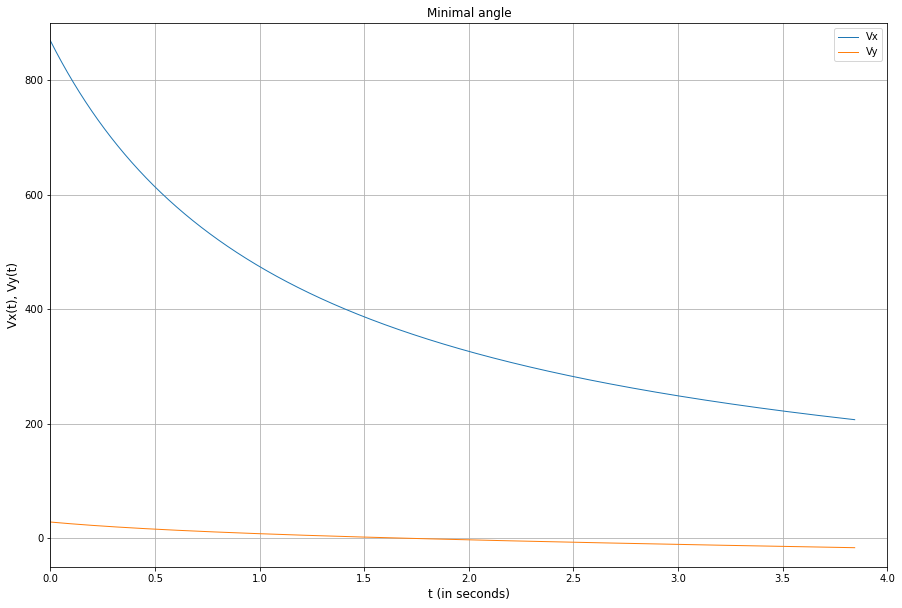

In [164]:
# plotting the result
fig = plt.figure(figsize=(15,10))                                  # create figure
plt.plot(t_arr, Vx_arr, linewidth = 1, label = 'Vx')    # plot Y to t
plt.plot(t_arr, Vy_arr, linewidth = 1, label = 'Vy')    # plot P to t
plt.title('Minimal angle', fontsize = 12)    # add some title to your plot
plt.xlabel('t (in seconds)', fontsize = 12)
plt.ylabel('Vx(t), Vy(t)', fontsize = 12)
plt.grid(True)                        # show grid
plt.axis([t_start, 4, -50, 900])     # show axes measures
plt.legend()
plt.show()

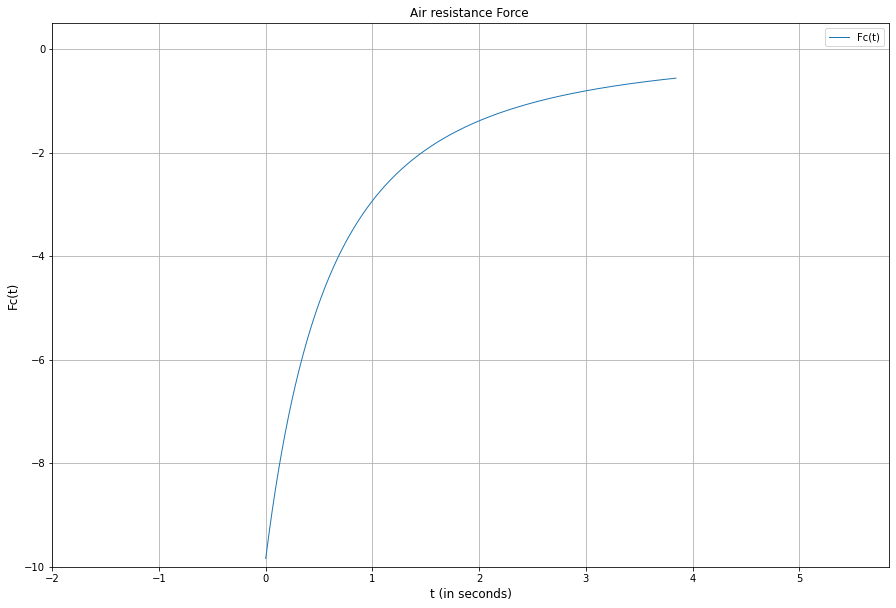

In [165]:
V_t = []
F_t = []
for vx, vy in zip(Vx_arr, Vy_arr):
    V_t.append(sqrt(vx**2 +vy**2))
    F_t.append(-k* (vx**2 +vy**2))

fig = plt.figure(figsize=(15,10))                                  # create figure
plt.plot(t_arr, F_t, linewidth = 1, label = 'Fc(t)')    # plot Y to t
plt.title('Air resistance Force ', fontsize = 12)    # add some title to your plot
plt.xlabel('t (in seconds)', fontsize = 12)
plt.ylabel('Fc(t)', fontsize = 12)
plt.grid(True)                        # show grid
plt.axis([t_start-2, t_end+2, -10, 0.5])     # show axes measures
plt.legend()
plt.savefig('fc_first.png', dpi=300)
plt.show()

In [93]:
S = 0
c = 0 # counter
tau = 0
while S<=L:
    S += Vx_arr[c]*Dt
    tau+=Dt
    c+=1
tau

3.8429999999996878

In [108]:
Dt = 0.001               # timestep Delta t
Vx_start = v0*cos(alpha2_rad)            # initial Vx
Vy_start = v0*sin(alpha2_rad)            # initial Vy
t_start = 0             # starttime
t_end = 80              # endtime
n_steps = int(round((t_end-t_start)/Dt))    # number of timesteps

Vx_arr = np.zeros(n_steps + 1)   # create an array of zeros for Vx
Vy_arr = np.zeros(n_steps +1)    # create an array of zeros for Vy
t_arr = np.zeros(n_steps + 1)   # create an array of zeros for t
t_arr[0] = t_start              # add starttime to array
Vx_arr[0] = Vx_start              # add initial value of Vx to array
Vy_arr[0] = Vy_start             # add initial value of Vy to array

# Euler's method
for i in range(1, n_steps + 1):
    Vx = Vx_arr[i - 1]
    Vy = Vy_arr[i - 1]
    t = t_arr[i - 1]
    dVx_dt = -(k / m) * sqrt(Vx ** 2 + Vy ** 2) * Vx  # calculate the derivative of Y
    dVy_dt = -g - (k / m) * sqrt(Vx ** 2 + Vy ** 2) * Vy  # calculate the derivative of Y
    Vx_arr[i] = Vx + Dt * dVx_dt  # calc. Vx at next timestep,add to array
    Vy_arr[i] = Vy + Dt * dVy_dt  # calc. Vy at next timestep,add to array
    t_arr[i] = t + Dt  # add new value of t to array


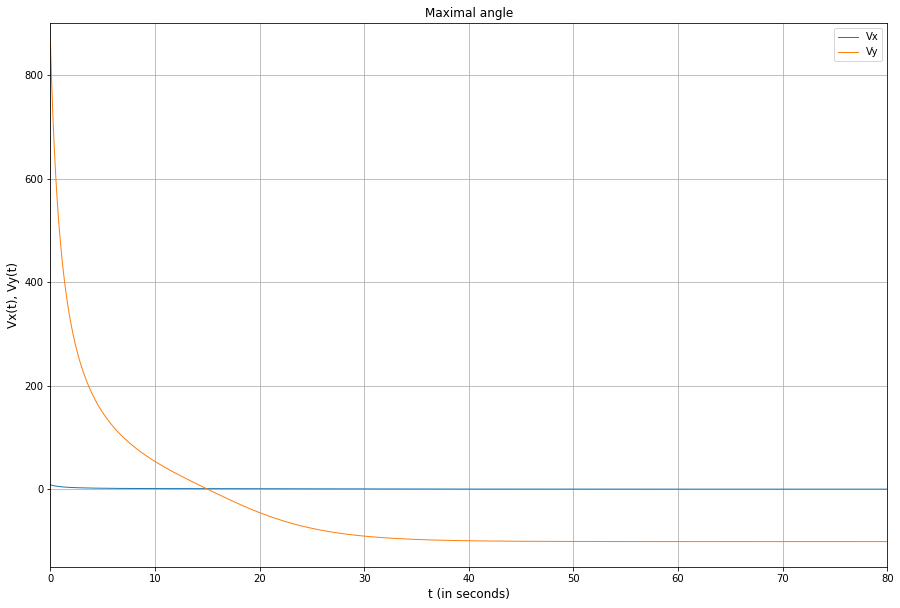

In [109]:
# plotting the result
fig = plt.figure(figsize=(15,10))                                  # create figure
plt.plot(t_arr, Vx_arr, linewidth = 1, label = 'Vx')    # plot Y to t
plt.plot(t_arr, Vy_arr, linewidth = 1, label = 'Vy')    # plot P to t
plt.title('Maximal angle', fontsize = 12)    # add some title to your plot
plt.xlabel('t (in seconds)', fontsize = 12)
plt.ylabel('Vx(t), Vy(t)', fontsize = 12)
plt.grid(True)                        # show grid
plt.axis([t_start, t_end, -150, 900])     # show axes measures
plt.legend()
plt.show()

In [111]:
S = 0
c = 0 # counter
tau = 0
while S<=L:
    S += Vx_arr[c]*Dt
    tau+=Dt
    c+=1
    if c%100 == 0:
        print("c: ",c, "Vx :", Vx_arr[c])
tau

c:  100 Vx : 7.807836524540748
c:  200 Vx : 7.251673934869749
c:  300 Vx : 6.770091519295501
c:  400 Vx : 6.349065882205828
c:  500 Vx : 5.977882582598524
c:  600 Vx : 5.648214444595715
c:  700 Vx : 5.353491709633522
c:  800 Vx : 5.088461619179427
c:  900 Vx : 4.848874129399629
c:  1000 Vx : 4.6312535318687695
c:  1100 Vx : 4.432729777669062
c:  1200 Vx : 4.250912055172108
c:  1300 Vx : 4.083792767083416
c:  1400 Vx : 3.9296737069233134
c:  1500 Vx : 3.7871086691956966
c:  1600 Vx : 3.654858377768971
c:  1700 Vx : 3.531854754220769
c:  1800 Vx : 3.417172343387923
c:  1900 Vx : 3.3100052775341737
c:  2000 Vx : 3.20964856580163
c:  2100 Vx : 3.1154827901779436
c:  2200 Vx : 3.0269615056924235
c:  2300 Vx : 2.943600803292268
c:  2400 Vx : 2.8649706143500255
c:  2500 Vx : 2.790687426904967
c:  2600 Vx : 2.720408153277094
c:  2700 Vx : 2.6538249421625895
c:  2800 Vx : 2.5906607697447073
c:  2900 Vx : 2.5306656766756412
c:  3000 Vx : 2.473613543172936
c:  3100 Vx : 2.419299314542429
c:  3200

IndexError: index 80001 is out of bounds for axis 0 with size 80001